
## Demonstration of rescaled equations


To avoid tricky float epsilon issues, it is desireable to rescale our equations from their original form to a new for as follows


$$ \frac{df'}{dt} = -\gamma f'  + \xi$$

$$ f_M = (1-X) f' - X f_{EM} + N$$




Lets implement this into our pipeline and check if our Kalman filter still works and if we can still infer the states.



In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [4]:
from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import priors_dict,bilby_priors_dict

### 1. Canonical example system 

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:You are including the PSR terms in your synthetic data generation


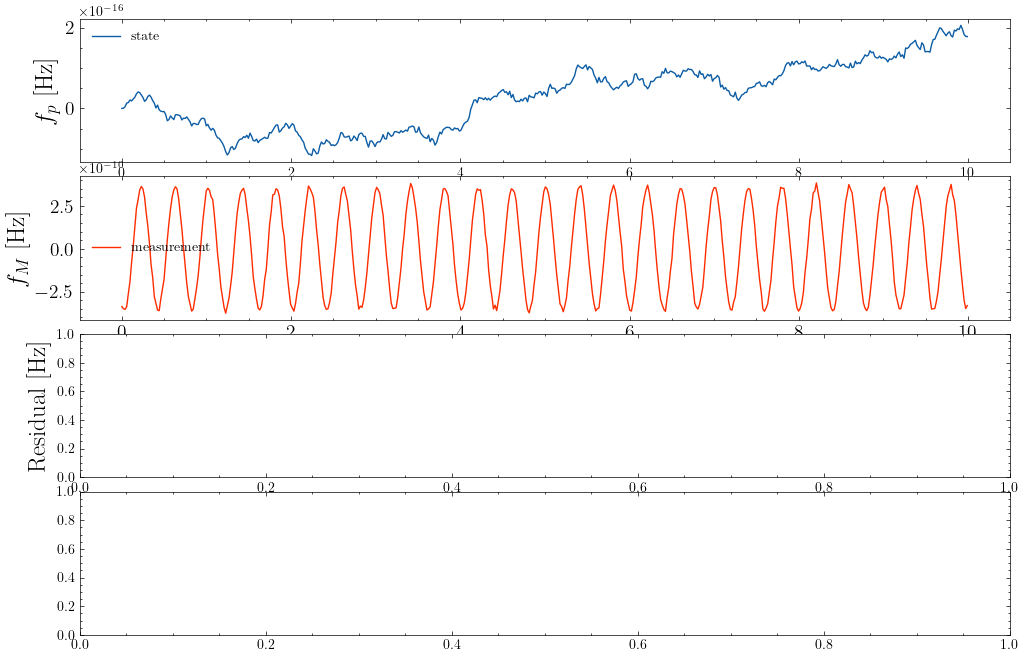

Mean residual: 6.858772466614833e-13


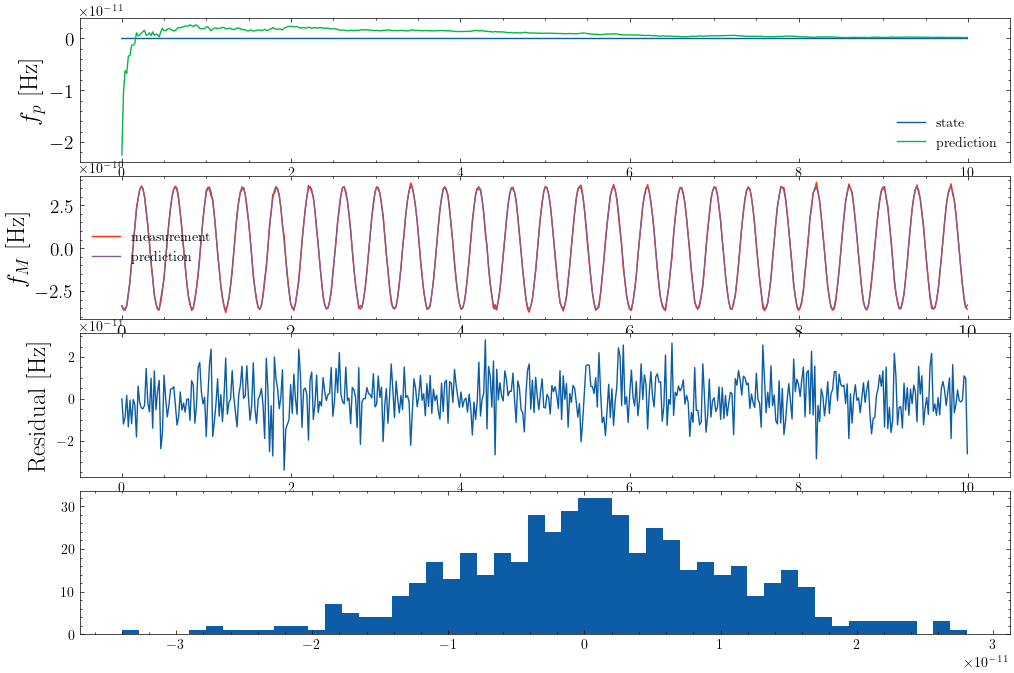

In [5]:
P   = SystemParameters(h=1e-12,σp=1e-20,σm=1e-11)
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data



#Define the model 
model = LinearModel(P)


#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


#Run the KF once with the correct parameters.
#This allows JIT precompile
guessed_parameters = priors_dict(PTA,P)
model_likelihood,xp,yp = KF.likelihood(guessed_parameters)

plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, None,None, 1,savefig=None)
plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, xp,yp, 1,savefig=None)



INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:You are including the PSR terms in your synthetic data generation


Mean residual: -6.921218684808807e-12


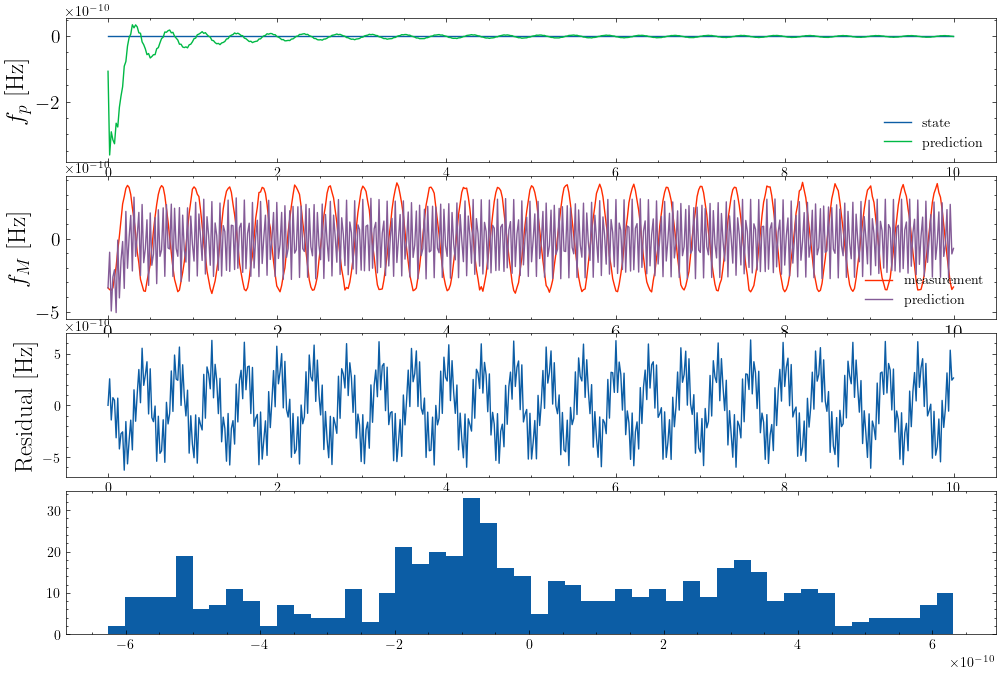

In [6]:
P   = SystemParameters(h=1e-12,σp=1e-20,σm=1e-11)
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data



#Define the model 
model = LinearModel(P)


#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


#Run the KF once with the correct parameters.
#This allows JIT precompile
guessed_parameters = priors_dict(PTA,P)
guessed_parameters["omega_gw"] = guessed_parameters["delta_gw"]*1.053435
model_likelihood,xp,yp = KF.likelihood(guessed_parameters)

plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, xp,yp, 1,savefig=None)



## Earth terms model

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using the Earth terms measurement model


Mean residual: -4.976250624535318e-12


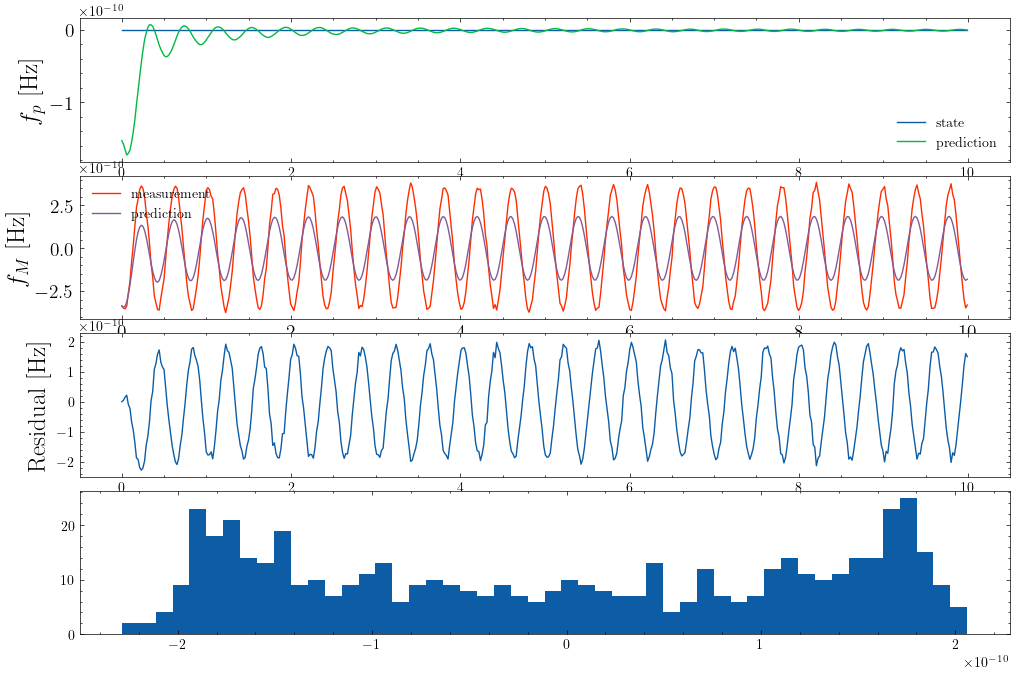

In [7]:
P   = SystemParameters(h=1e-12,σp=1e-20,σm=1e-11,measurement_model="earth")
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data



#Define the model 
model = LinearModel(P)


#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


#Run the KF once with the correct parameters.
#This allows JIT precompile
guessed_parameters = priors_dict(PTA,P)
model_likelihood,xp,yp = KF.likelihood(guessed_parameters)

plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, xp,yp, 1,savefig=None)



## Null model

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using just the null measurement model


Mean residual: -205.53069903288917


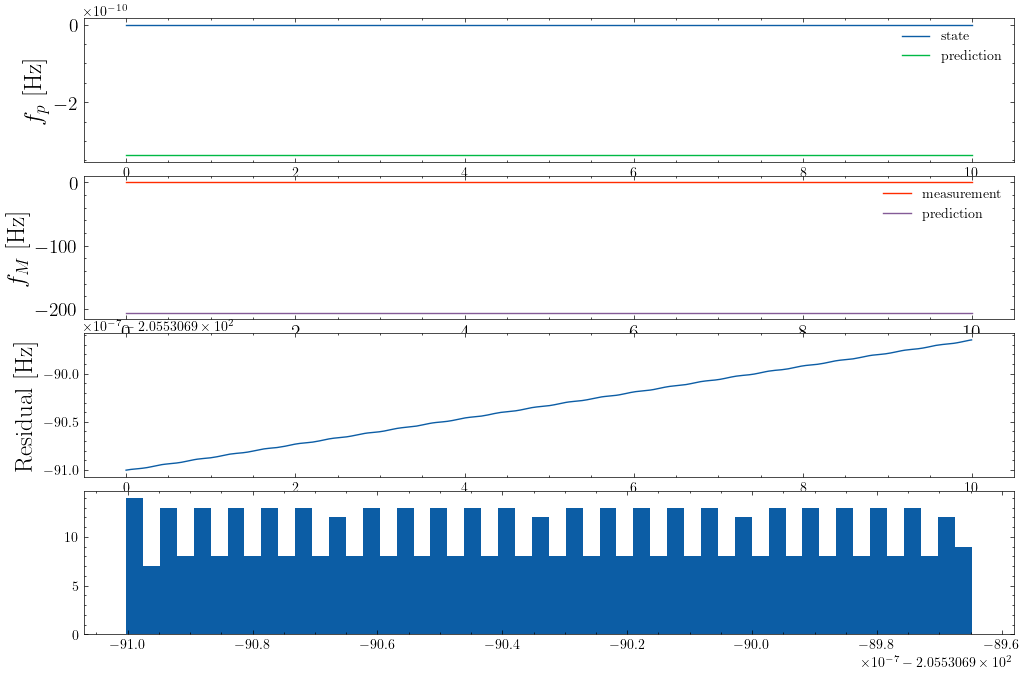

In [14]:
P   = SystemParameters(h=1e-12,σp=1e-20,σm=1e-11,measurement_model="null")
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data



#Define the model 
model = LinearModel(P)


#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


#Run the KF once with the correct parameters.
#This allows JIT precompile
guessed_parameters = priors_dict(PTA,P)
model_likelihood,xp,yp = KF.likelihood(guessed_parameters)

plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, xp,yp, 1,savefig=None)



# Compare two systems with different $\sigma_p$

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:You are including the PSR terms in your synthetic data generation


Text(0.5, 0, 't [s]')

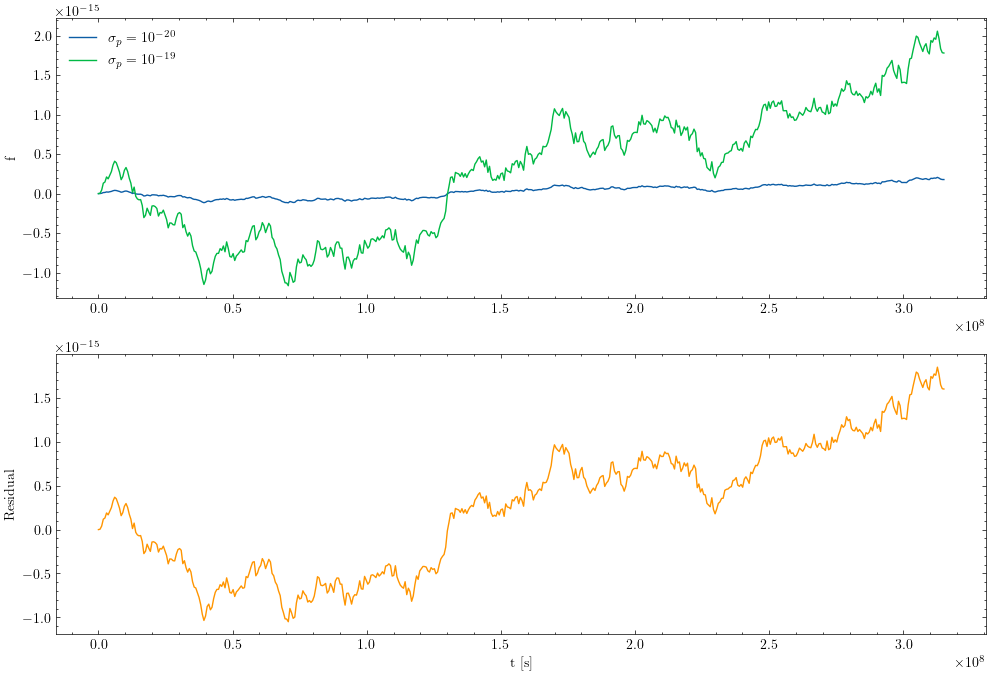

In [9]:
P1   = SystemParameters(h=1e-12,σp=1e-20,σm=1e-11)
PTA1 = Pulsars(P1)               # setup the PTA
data1 = SyntheticData(PTA1,P1) # generate some synthetic data


P2   = SystemParameters(h=1e-12,σp=1e-19,σm=1e-11)
PTA2 = Pulsars(P2)               # setup the PTA
data2 = SyntheticData(PTA2,P2) # generate some synthetic data


import matplotlib.pyplot as plt 
h,w = 12,8
rows = 2
cols = 1
fig, (ax1,ax2) = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=False)

idx = 1
ax1.plot(PTA1.t,data1.intrinsic_frequency[:,idx],label=r'$\sigma_p = 10^{-20}$')
ax1.plot(PTA1.t,data2.intrinsic_frequency[:,idx],label=r'$\sigma_p = 10^{-19}$')
ax1.legend()
ax1.set_ylabel('f')

ax2.plot(PTA1.t,data2.intrinsic_frequency[:,idx] -data1.intrinsic_frequency[:,idx],c='C2')
ax2.set_ylabel('Residual')
ax2.set_xlabel('t [s]')





### Compare two systems with same seeds

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation


Text(0.5, 0, 't [s]')

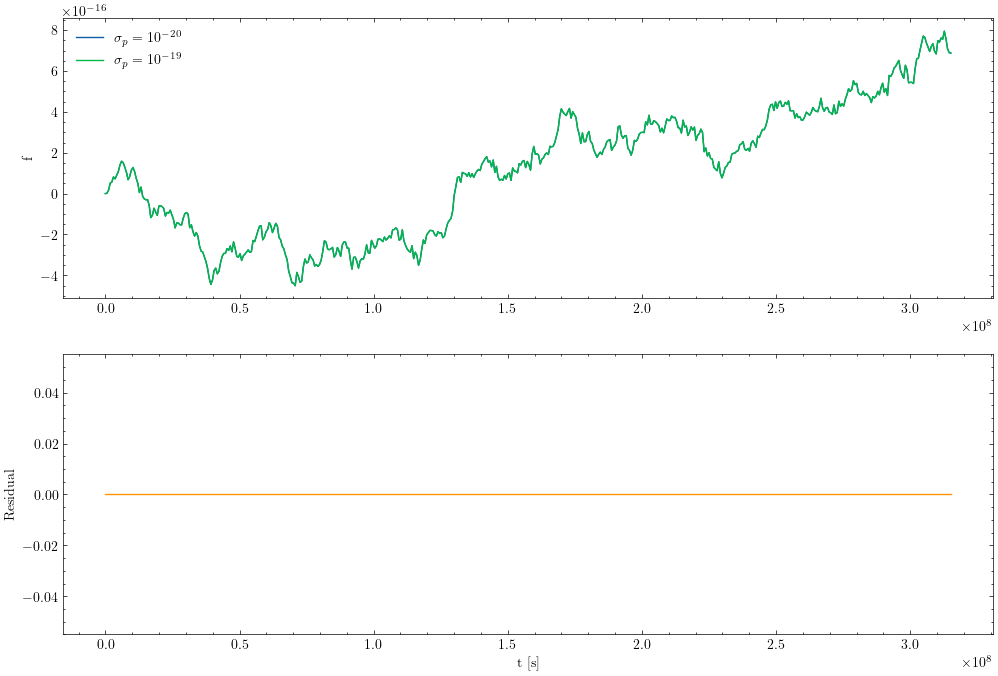

In [11]:
P1   = SystemParameters(h=1e-12,σp=None,σm=1e-11,seed=1234)
PTA1 = Pulsars(P1)               # setup the PTA
data1 = SyntheticData(PTA1,P1) # generate some synthetic data


P2   = SystemParameters(h=1e-12,σp=None,σm=1e-11,seed=1234)
PTA2 = Pulsars(P2)               # setup the PTA
data2 = SyntheticData(PTA2,P2) # generate some synthetic data


import matplotlib.pyplot as plt 
h,w = 12,8
rows = 2
cols = 1
fig, (ax1,ax2) = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=False)

idx = 1
ax1.plot(PTA1.t,data1.intrinsic_frequency[:,idx],label=r'$\sigma_p = 10^{-20}$')
ax1.plot(PTA1.t,data2.intrinsic_frequency[:,idx],label=r'$\sigma_p = 10^{-19}$')
ax1.legend()
ax1.set_ylabel('f')

ax2.plot(PTA1.t,data2.intrinsic_frequency[:,idx] -data1.intrinsic_frequency[:,idx],c='C2')
ax2.set_ylabel('Residual')
ax2.set_xlabel('t [s]')





## Compare two systems with different seeds

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation


Text(0.5, 0, 't [s]')

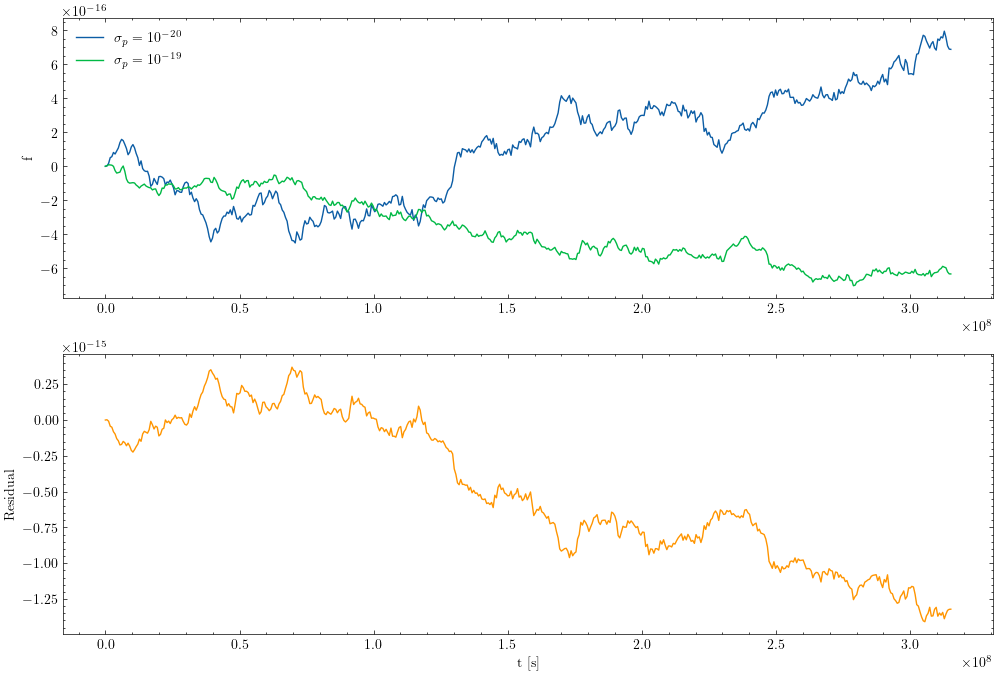

In [12]:
P1   = SystemParameters(h=1e-12,σp=None,σm=1e-11,seed=1234)
PTA1 = Pulsars(P1)               # setup the PTA
data1 = SyntheticData(PTA1,P1) # generate some synthetic data


P2   = SystemParameters(h=1e-12,σp=None,σm=1e-11,seed=1235)
PTA2 = Pulsars(P2)               # setup the PTA
data2 = SyntheticData(PTA2,P2) # generate some synthetic data


import matplotlib.pyplot as plt 
h,w = 12,8
rows = 2
cols = 1
fig, (ax1,ax2) = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=False)

idx = 1
ax1.plot(PTA1.t,data1.intrinsic_frequency[:,idx],label=r'$\sigma_p = 10^{-20}$')
ax1.plot(PTA1.t,data2.intrinsic_frequency[:,idx],label=r'$\sigma_p = 10^{-19}$')
ax1.legend()
ax1.set_ylabel('f')

ax2.plot(PTA1.t,data2.intrinsic_frequency[:,idx] -data1.intrinsic_frequency[:,idx],c='C2')
ax2.set_ylabel('Residual')
ax2.set_xlabel('t [s]')





## Compare the states of different pulsars in the same system

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:You are including the PSR terms in your synthetic data generation


Text(0.5, 0, 't [s]')

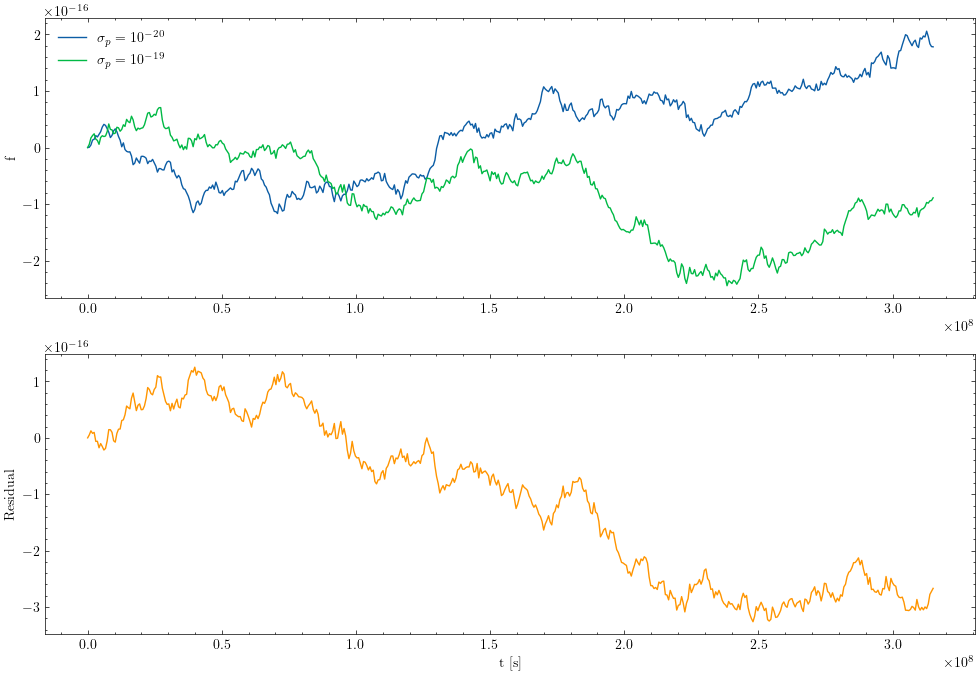

In [13]:
P1   = SystemParameters(h=1e-12,σp=1e-20,σm=1e-11,seed=1234)
PTA1 = Pulsars(P1)               # setup the PTA
data1 = SyntheticData(PTA1,P1) # generate some synthetic data


import matplotlib.pyplot as plt 
h,w = 12,8
rows = 2
cols = 1
fig, (ax1,ax2) = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=False)

idx = 1
ax1.plot(PTA1.t,data1.intrinsic_frequency[:,1],label=r'$\sigma_p = 10^{-20}$')
ax1.plot(PTA1.t,data1.intrinsic_frequency[:,2],label=r'$\sigma_p = 10^{-19}$')
ax1.legend()
ax1.set_ylabel('f')

ax2.plot(PTA1.t,data1.intrinsic_frequency[:,2] -data1.intrinsic_frequency[:,1],c='C2')
ax2.set_ylabel('Residual')
ax2.set_xlabel('t [s]')

this makes sense since all pulsars currently share the same $\gamma$ and $\sigma_p$

---



## Likelihood curves

In [66]:
from plotting import iterate_over_priors


import matplotlib.pyplot as plt 
def plot_likelihood(x,y,x_logscale,y_logscale,variable_name,x_critical,savefig):

    h,w = 12,8
    rows = 1
    cols = 1
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=False)

    ax.plot(x,y)

    if x_logscale:
        ax.set_xscale('log')
    if y_logscale:
        ax.set_yscale('log')

    ax.axvline(x_critical,linestyle='--', c='C2')

    ax.set_xlabel(variable_name)
    ax.set_ylabel("likelihood")


    if savefig != None:
        plt.savefig(f"../data/images/{savefig}.png", bbox_inches="tight",dpi=300)

    plt.show()



In [88]:
P   = SystemParameters(h=1e-12,σp=0.0,σm=1e-11,measurement_model="earth")
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data



#Define the model 
model = LinearModel(P)


#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Attention: You are including the PSR terms in your synthetic data generation
INFO:root:You are using the Earth terms measurement model


---


#### 2.1 GW source declination - $\delta$ 

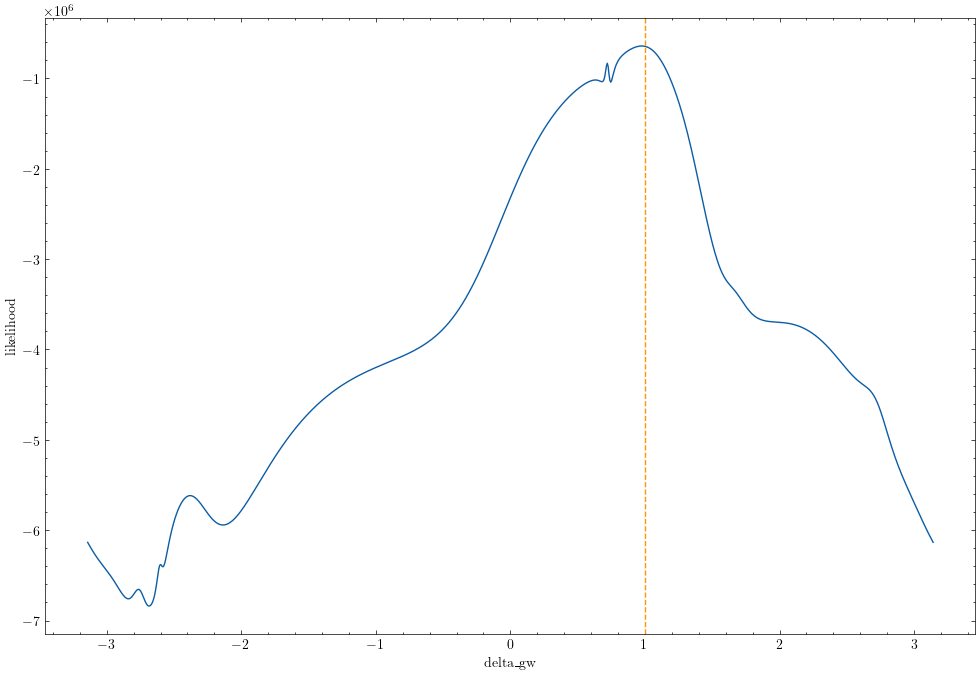

In [89]:
import numpy as np 
variable = "delta_gw"
variable_range = np.linspace(-np.pi,np.pi,int(1e3))
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,False,False,variable,guessed_parameters[variable],savefig='likelihood_delta_1')


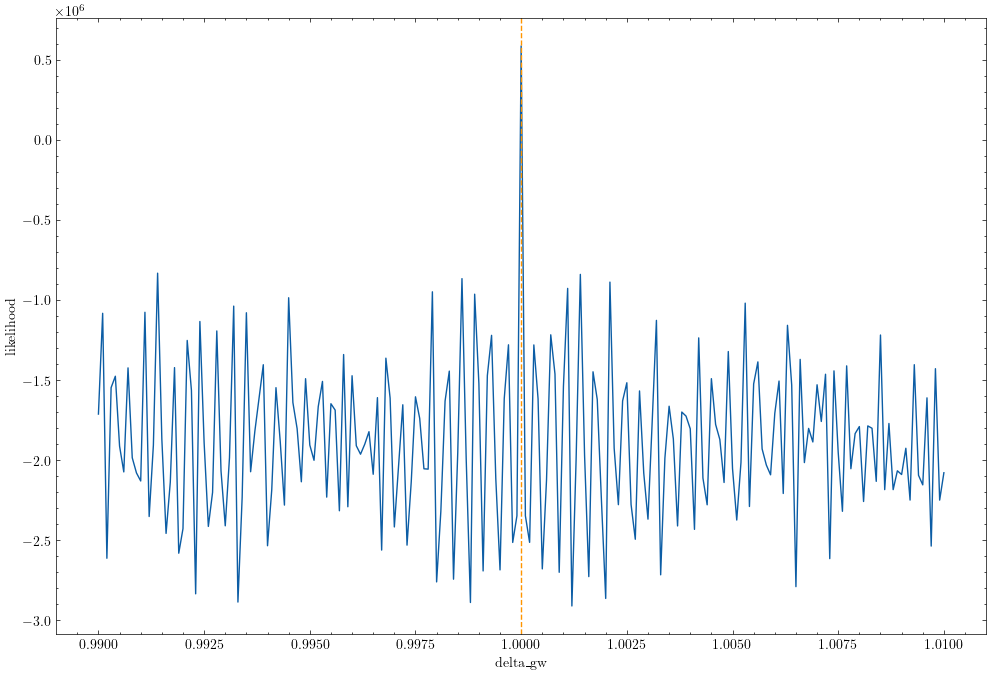

In [70]:
variable = "delta_gw"
variable_range = np.arange(0.99,1.01,0.0001)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,False,False,variable,guessed_parameters[variable],savefig='likelihood_delta_2')


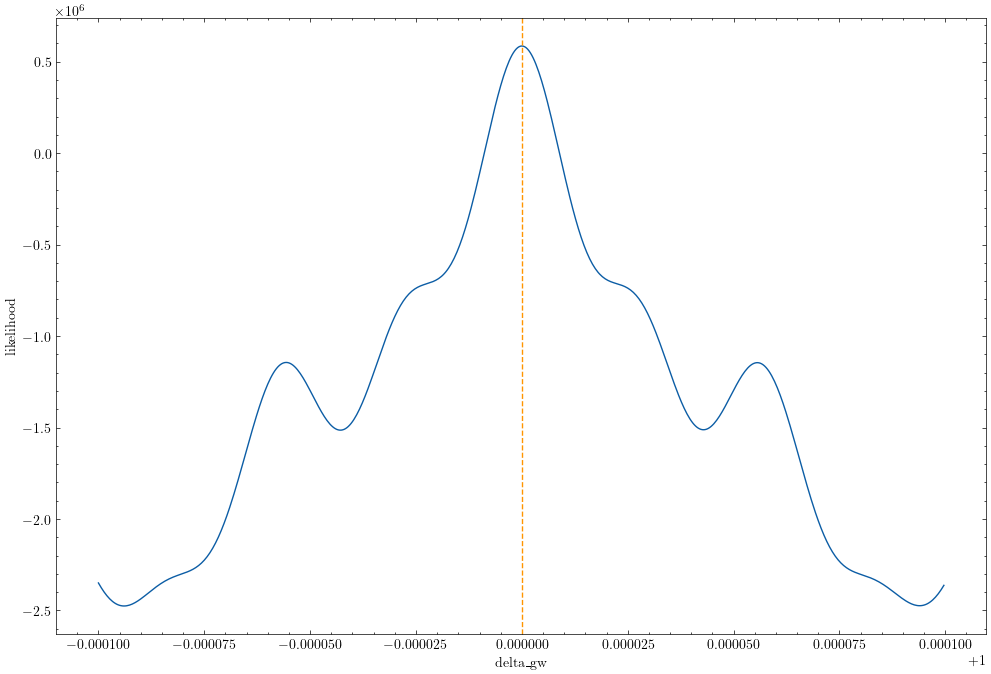

In [71]:
variable = "delta_gw"
eps = 1e-4
variable_range = np.arange(1.0-eps,1.0+eps,eps/300.0)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,False,False,variable,guessed_parameters[variable],savefig='likelihood_delta_3')


---


#### 2.2 GW source angular frequency - $\omega$ 

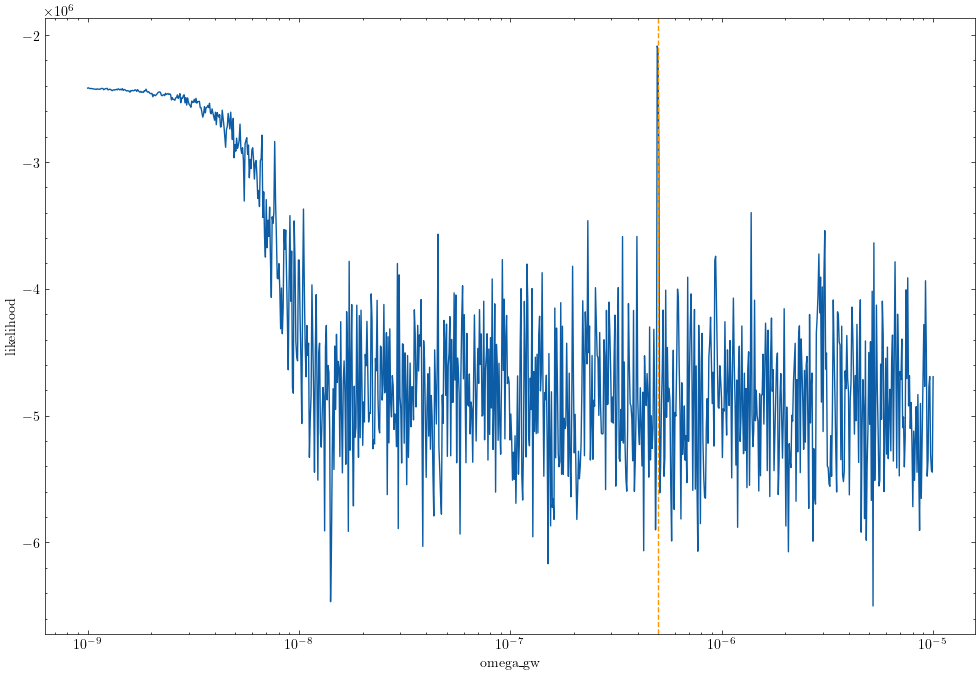

In [72]:
variable = "omega_gw"
variable_range = np.logspace(-9,-5,int(1e3))
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,False,variable,guessed_parameters[variable],savefig='likelihood_omega_1')


In [73]:
i=990
variable_range[i] - variable_range[i-1]

8.446439815893178e-08

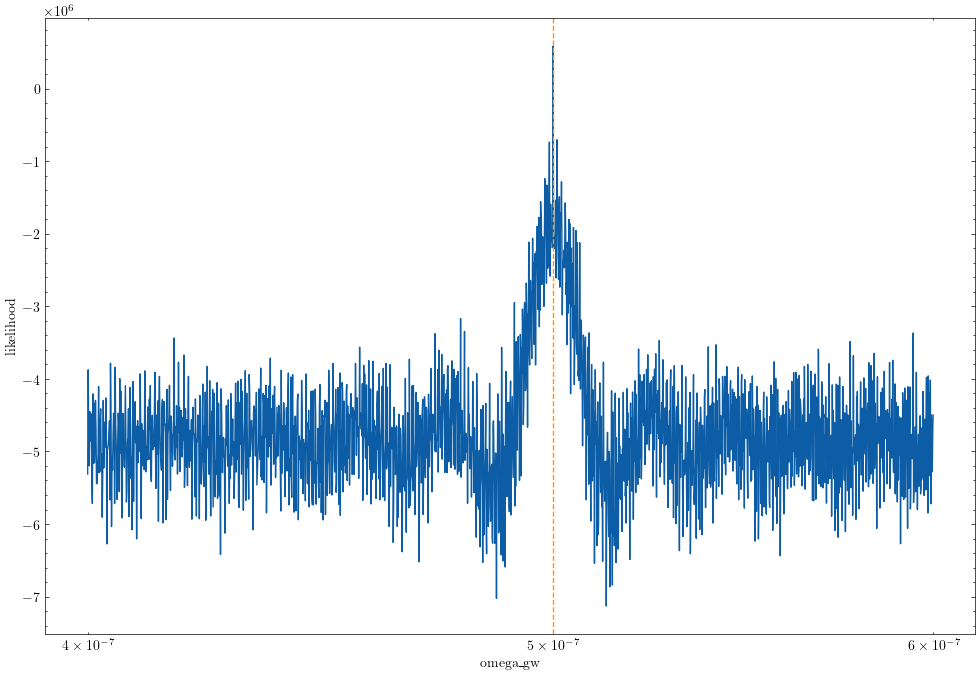

In [74]:
variable = "omega_gw"
variable_range = np.arange(4e-7,6e-7,1e-10)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,False,variable,guessed_parameters[variable],savefig='likelihood_omega_2')


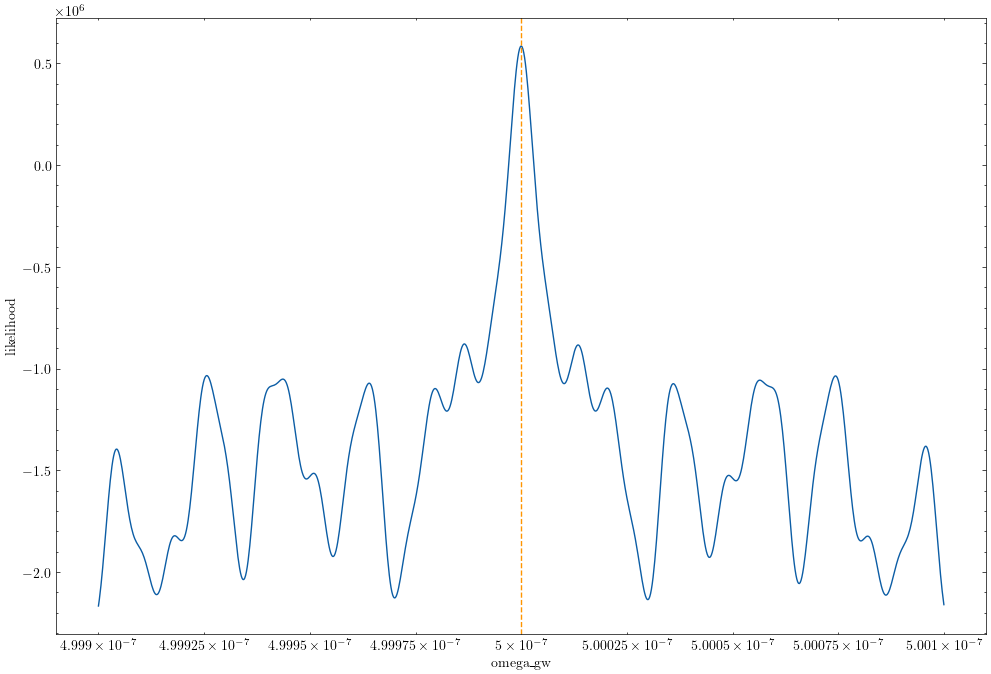

In [75]:
variable = "omega_gw"
eps = 1e-10
variable_range = np.arange(5e-7-eps,5e-7+eps,eps/500.0)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,False,variable,guessed_parameters[variable],savefig='likelihood_omega_3')


#### 2.3 GW source phase offset - $\Phi_0$

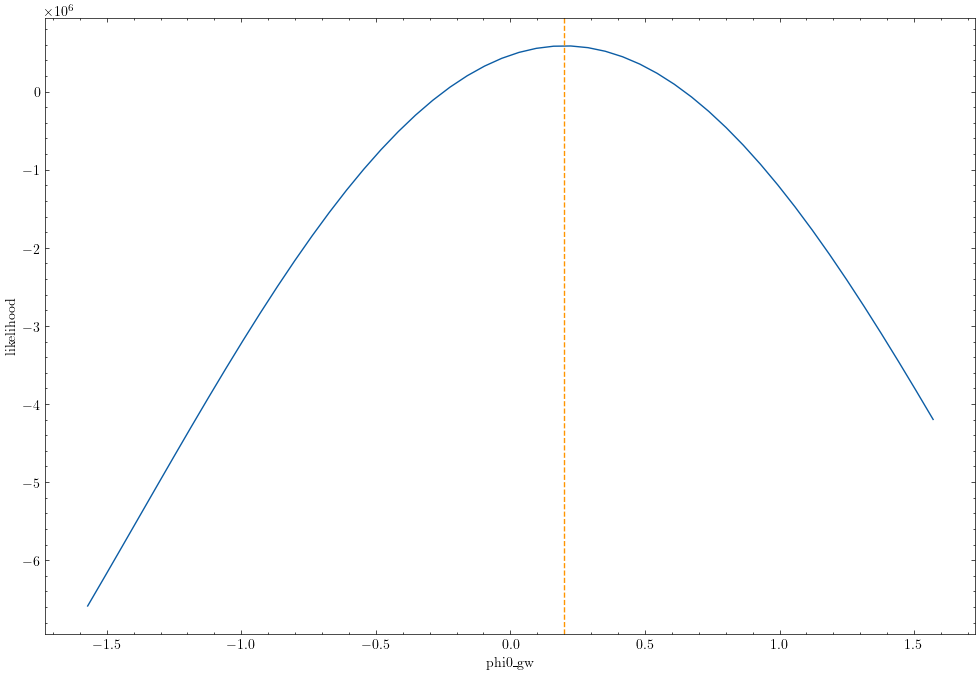

In [76]:
variable = "phi0_gw"
variable_range = np.linspace(-np.pi/2,np.pi/2)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,False,False,variable,guessed_parameters[variable],savefig=None)


### 3. All likelihood curves for $\bar{\theta}_{GW}$

0 omega_gw 5e-07
1 psi_gw 2.5
2 phi0_gw 0.2
3 iota_gw 1.0
4 delta_gw 1.0
5 alpha_gw 1.0
6 h 1e-12


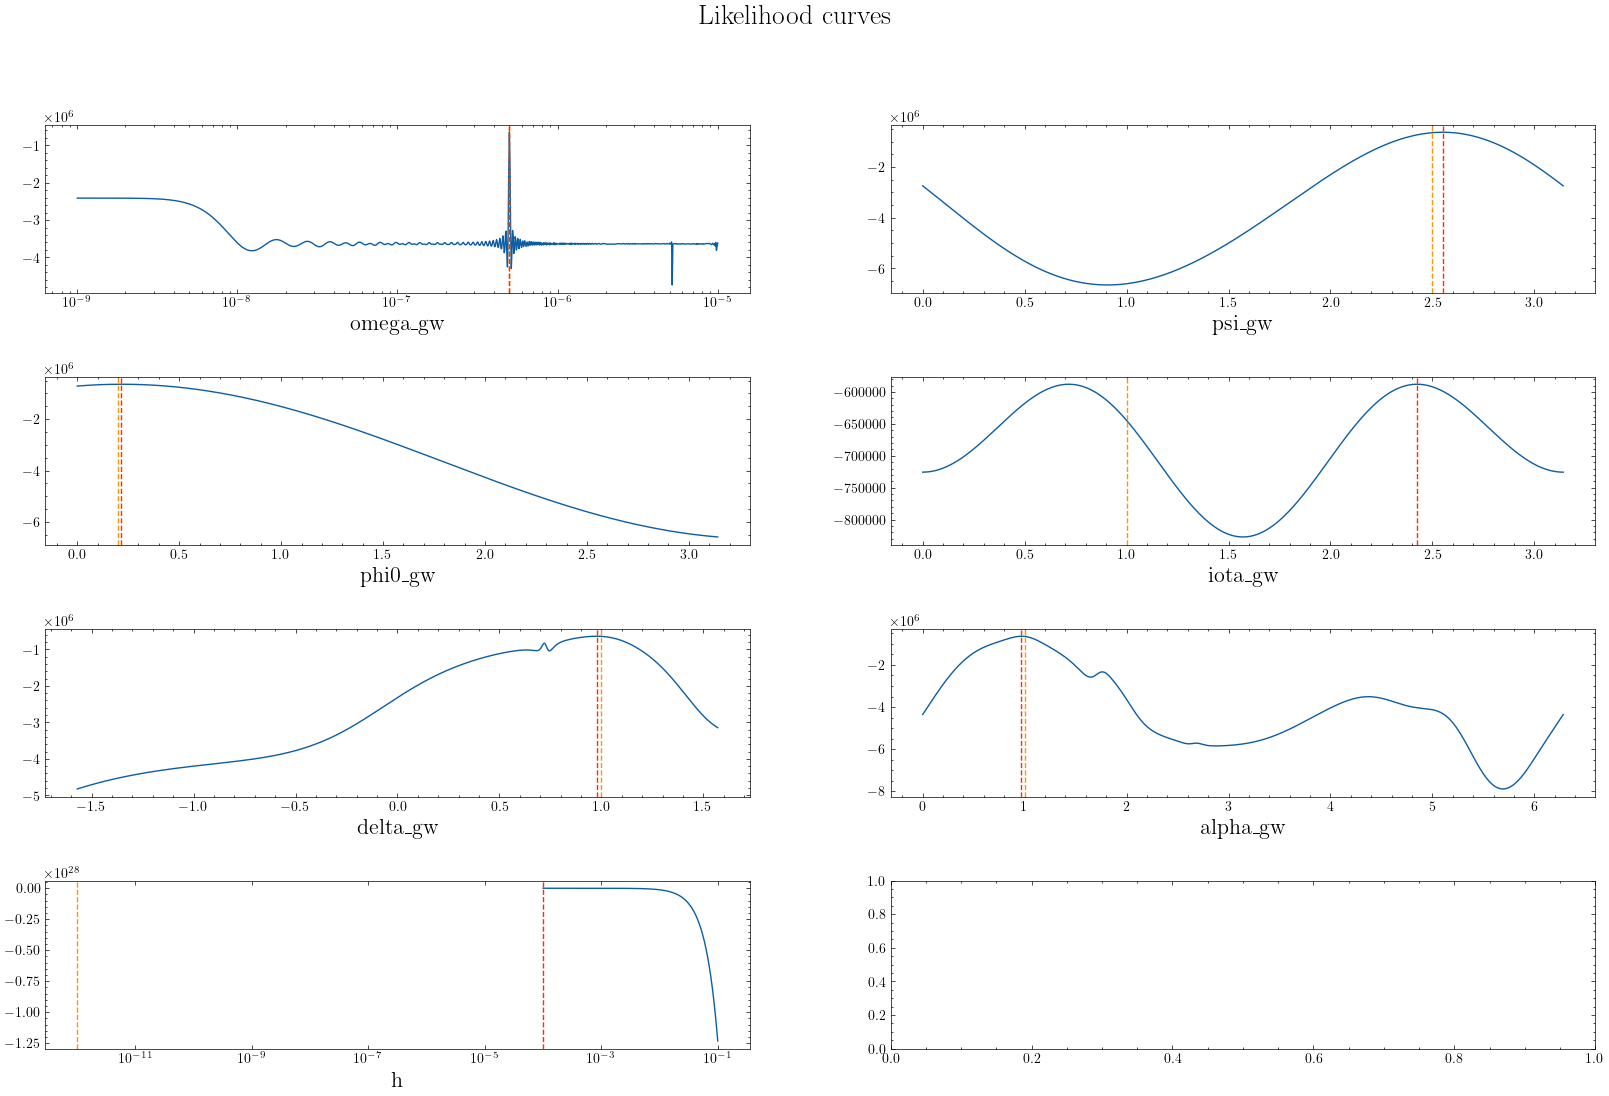

In [86]:
selected_parameters = ["omega_gw",
                       "psi_gw",
                        "phi0_gw",
                        "iota_gw",
                        "delta_gw",
                        "alpha_gw",
                        "h"]
parameters_dict = {k: guessed_parameters[k] for k in selected_parameters}


nsamples = int(1e3)

priors = [np.logspace(-9,-5,nsamples),                   # omega
          np.linspace(0,np.pi,nsamples),               # psi
          np.linspace(0,np.pi,nsamples),               # phi0
          np.linspace(0,np.pi,nsamples),               # iota
          np.linspace(-np.pi/2.0,np.pi/2.0,nsamples),    # delta
          np.linspace(0,2*np.pi,nsamples),               # alpha
          np.logspace(-4,-1,nsamples),                   # h
]

from plotting import likelihoods_over_priors
likelihoods_over_priors(parameters_dict,priors,PTA,P,KF,"Likelihood curves", savefig=None)
